# Clase!

## Contenidos:
* [Groupby](#groupby)
* [Merge](#merge)
* [Melt](#melt)
* [Sanity-Check](#sc)
## Motivación:
Manipular datos con pandas es sencillo, hacer agrupaciones, cruces y reformatos se logra de manera intuitiva. A continuación veremos un par de ejemplos de como hacer estas acciones.

OBS: Al contrario de NumPy, Pandas esta orientado a los datos (no a los algoritmos/calculos), por eso, las estructuras de datos que usan son distintas:
 * Numpy: Usan array, lo que es equivalente a una matriz, su tamaño no es mutable y el tipo de data (*dtype*) debería ser única dentro del arreglo.
 * Pandas: Usan Series y DataFrame (*a Series of Series*), estos pueden modificar su tamaño y pueden contener cualquier tipo de datos

Primero, Importamos las librerías correspondientes

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

Estos son los alias estandar para estas librerías

In [2]:
%matplotlib inline
#permite que los gráficos se muestren en el notebook

### Groupby: <a id = "groupby"></a>
Esta operación permite agrupar registros basados en distintas operaciones:
 1. Conteo (*.count()*, *size()* )
 2. Suma (*.sum()* )
 3. Media (*.mean()* )
 4. Desviación estandar (*.str()* (dentro de cada grupo))
 5. Custom (revisar [documentación de los objetos DataFramegroupby y aggregate](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html))

Ahora generemos los datos:

In [3]:
n=1000 #cantidad de registros
edad = (np.random.randint(low=18,high=80,size=n)) #TIP: presione shift+tab dentro de una funcion para ver su *signature*
inc = np.random.normal(400e3,5e3,size=n)
reg = (np.random.randint(low=0,high=13,size=n))

In [4]:
df = pd.DataFrame({'edad':edad,
                   'income':inc,
                   'region':reg
                  }) # Creamos el pandas.DataFrame como un diccionario de listas o arreglos

Agreguemos alguna interacción para que no sea tan fome...

In [5]:
df = pd.DataFrame({'edad':edad,
                   'income':inc,
                   'region':reg
                  }) # Creamos el pandas.DataFrame como un diccionario de listas o arreglos
df.income = ((df.edad.values-55)*4)**2 + df.income.values - df.region*1e4
display(df.head(5)) # primeros 5 registros
display(df.tail(5)) # últimos 5 registros

,edad,income,region
0,49,396890.744315,1
1,29,336160.408340,7
2,60,341940.317812,6
3,48,301264.365866,10
4,52,282386.980095,11


,edad,income,region
995,26,335349.422590,8
996,62,343453.945116,6
997,44,383918.053374,2
998,74,309431.824329,10
999,54,395263.189681,0


In [6]:
def rango(edad): # TIP: Cualquier función que tenga un Docstring, se puede verificar con shift+tab 
    '''Calcula en que rango de edad cae un registro, toma un float.
    Retorna: str
    ''' # <--- este es el Docstring
    if edad<35:
        return 'joven'
    elif edad<55:
        return 'menos joven'
    else:
        return 'mayor'
    

Aplica la funcion rango a toda la columna edad y se la asigna a la columna *rango edad*

In [7]:
df['rango edad'] = df.edad.apply(rango) 
df.head(10)

,edad,income,region,rango edad
0,49,396890.744315,1,menos joven
1,29,336160.408340,7,joven
2,60,341940.317812,6,mayor
3,48,301264.365866,10,menos joven
4,52,282386.980095,11,menos joven
5,78,323496.028221,8,mayor
6,38,309681.000878,10,menos joven
7,27,408388.406323,0,joven
8,43,288586.098080,11,menos joven
9,25,377934.045415,3,joven


Agrupemos el income por rango de edad, primero contemos cuantos registros hay en cada clase

In [8]:
df[['rango edad','income']].groupby('rango edad')

In [9]:
display(df[['rango edad','income']].groupby('rango edad').count())

,income
rango edad,
joven,271
mayor,417
menos joven,312


veamos ahora el promedio y la desviación estandar por cada grupo

In [10]:
display(df[['rango edad','income']].groupby('rango edad').mean())
display(df[['rango edad','income']].groupby('rango edad').std())

,income
rango edad,
joven,351388.400737
mayor,345169.673418
menos joven,344699.164030


,income
rango edad,
joven,36688.330224
mayor,37971.868201
menos joven,38268.048766


In [11]:
df[['rango edad','region','income']].groupby(['rango edad','region']).mean()

income
rango edad  region               
joven       0       410808.948171
            1       400364.321494
            2       394056.563627
            3       383460.944787
            4       374240.352505
            5       364000.698429
            6       354660.378396
            7       343699.926835
            8       333069.982648
            9       325035.032760
            10      313975.638522
            11      303258.630340
            12      296618.770415
mayor       0       404052.224924
            1       394311.483621
            2       380890.907332
            3       373935.875111
            4       363099.530049
            5       354779.630675
            6       343428.841782
            7       332817.376544
            8       324340.247115
            9       312931.670753
            10      302963.455855
            11      293451.957863
            12      283015.637477
menos joven 0       403304.438421
            1       391011.609635
            2       381011.975032
            3       372301.558554
            4       362079.519592
            5       352896.029447
            6       343047.909517
            7       331942.144358
            8       321868.137694
            9       312222.677993
            10      301755.990094
            11      292131.497910
            12      281550.563137

In [12]:
grouped = df[['rango edad','region','income']].groupby(['rango edad','region']).std()
grouped


income
rango edad  region             
joven       0       6325.103677
            1       7770.959659
            2       7834.476429
            3       6249.995945
            4       6613.299238
            5       6037.384361
            6       5089.914956
            7       5097.150270
            8       7451.619408
            9       6735.442838
            10      7855.288613
            11      6636.989378
            12      7576.441027
mayor       0       5194.908958
            1       5551.082014
            2       4798.689199
            3       5437.305554
            4       4195.838147
            5       6824.303763
            6       5911.895746
            7       4982.159055
            8       6557.209929
            9       5047.877783
            10      7031.516230
            11      4901.462007
            12      5730.822982
menos joven 0       5042.505564
            1       6957.070301
            2       4488.062523
            3       4439.117272
            4       6425.869404
            5       5634.546716
            6       4978.569211
            7       5978.092553
            8       5711.073139
            9       4874.729464
            10      5359.068424
            11      7216.367778
            12      6216.915573

In [13]:
grouped.loc['menos joven',0]

income    5042.505564
Name: (menos joven, 0), dtype: float64

In [14]:
df[(df.edad>30) & (df.edad<50) & (df.region == 2) ][['edad','income']].describe()

,edad,income
count,24.000000,24.000000
mean,41.041667,382244.087119
std,5.278992,4665.475799
min,32.000000,370985.041940
25%,36.750000,380024.972932
50%,41.500000,382396.215919
75%,46.000000,384559.365199
max,49.000000,394593.465288


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5d4978630>,
      dtype=object)

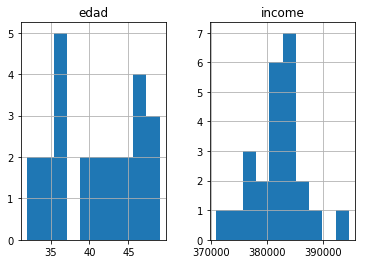

In [15]:
df[(df.edad>30) & (df.edad<50) & (df.region == 2) ][['edad','income']].hist()

### Merge <a id='merge'> </a>
Merge es la operación equivalente a los *join* en *SQL*, nos permite juntar dos dataframes basado en los valores de una columna.

Notemos que existen distintas maneras de hacer eso:
 * Inner.
 * Outer.
 
Para más detalles estudie la documentación en este [link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).

Ahora definamos un poco de metadata para pegarselo a nuestro dataframe original

In [16]:
df_meta = pd.DataFrame({'grupo etario':['menor de edad','joven','menos joven','mayor'],
                        'clasificacion':[0,1,2,3],
                        'ingreso_promedio':[352000, 343000, 347000,np.nan]
                       })
df_meta

,clasificacion,grupo etario,ingreso_promedio
0,0,menor de edad,352000.0
1,1,joven,343000.0
2,2,menos joven,347000.0
3,3,mayor,NaN


Juntemos nuestro dataframe anterior con esta nueva información que tenemos...

In [17]:
merged = pd.merge(df,df_meta, # df es el left (izquierda de la coma) df_meta es el right (derecha de la coma)
                  left_on='rango edad', # nombre de la llave en el dataframe de la izquierda
                  right_on='grupo etario', # nombre de la llave en el dataframe de la izquierda
                  how='inner',
                  indicator=True # agrega una columna _merge, que dice que registros estaban en que dataframe
                 )
merged.head()

,edad,income,region,rango edad,clasificacion,grupo etario,ingreso_promedio,_merge
0,49,396890.744315,1,menos joven,2,menos joven,347000.0,both
1,48,301264.365866,10,menos joven,2,menos joven,347000.0,both
2,52,282386.980095,11,menos joven,2,menos joven,347000.0,both
3,38,309681.000878,10,menos joven,2,menos joven,347000.0,both
4,43,288586.098080,11,menos joven,2,menos joven,347000.0,both


Veamos como difieren el income del del ingreso promedio  

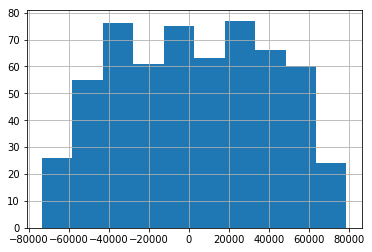

In [18]:
(merged.income - merged.ingreso_promedio).hist() 

#### Ejemplo con dos llaves
En ciertos casos, necesitamos pegar DataFrames usando varias columnas, esta situación es trivial usando pd.merge.

Veamos un caso nuevo...

In [19]:
cuentas = np.random.randint(low=100,high=200,size=10000)*17000 
opes = np.random.randint(low=100,high=200,size=10000)
df_registros = pd.DataFrame({'cuenta':cuentas,
                               'operacion':opes,
                              'moroso': np.random.binomial(1,0.05,size=10000)})
df_registros = df_registros[['cuenta',
                               'operacion',
                              'moroso']] 

In [20]:
df_registros = df_registros.sort_values(['cuenta','operacion']) # así ordenamos un dataframe en base a una columna

In [21]:
df_llaves = df_registros[['cuenta','operacion']].drop_duplicates().copy()
df_llaves = df_llaves.reset_index()

In [22]:
df_llaves.head()

,index,cuenta,operacion
0,1767,1700000,100
1,223,1700000,102
2,3709,1700000,103
3,5096,1700000,104
4,1878,1700000,105


In [23]:
df_registros = df_registros.reset_index() 
df_registros.pop('index')
df_registros.head()

,cuenta,operacion,moroso
0,1700000,100,0
1,1700000,100,0
2,1700000,102,0
3,1700000,102,0
4,1700000,103,0


Unamos la de registros, con su llave única, ¿Como haríamos esto?...

Necesitamos unir por cuenta y operación!

In [24]:
merged = pd.merge(df_registros,df_llaves,
                  how='inner',
                  left_on=['cuenta','operacion'],
                  right_on=['cuenta','operacion'])
merged.head()

,cuenta,operacion,moroso,index
0,1700000,100,0,1767
1,1700000,100,0,1767
2,1700000,102,0,223
3,1700000,102,0,223
4,1700000,103,0,3709


De hecho, si los DataFrames contienen columnas con mismos nombres, el merge se hace sobre esas columnas, por lo que el código anterior se reduce a:

In [25]:
merged = pd.merge(df_registros,df_llaves,
                  how='inner',
                    )
merged.head()

,cuenta,operacion,moroso,index
0,1700000,100,0,1767
1,1700000,100,0,1767
2,1700000,102,0,223
3,1700000,102,0,223
4,1700000,103,0,3709


### Melt <a id ='melt'> </a>

Esta operación permite reestructurar un Dataframe a un formato que sea más sencillo de manipular ([link a documentación](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html)).

Generemos datos para un ejemplo:

In [26]:
data = { i:[np.random.randint(low=1,high=11)
            for j in range(7)
           ]
        for i in range(10)
       }
cols=['person {}'.format(i) for i in range(10)]
to_melt = pd.DataFrame(data)
to_melt.columns=cols
to_melt['year']= range(2010,2017)
to_melt

,person 0,person 1,person 2,person 3,person 4,person 5,person 6,person 7,person 8,person 9,year
0,3,2,4,1,7,5,4,7,8,3,2010
1,5,8,10,8,2,5,2,7,1,2,2011
2,2,5,7,5,7,3,7,1,8,4,2012
3,3,8,10,4,5,5,1,1,7,9,2013
4,2,6,1,1,4,3,4,10,5,1,2014
5,4,6,3,6,8,7,9,2,6,6,2015
6,3,3,8,9,4,1,9,2,7,1,2016


In [27]:
melted = pd.melt(to_melt, id_vars=['year'], var_name='Name')
melted.head()

,year,Name,value
0,2010,person 0,3
1,2011,person 0,5
2,2012,person 0,2
3,2013,person 0,3
4,2014,person 0,2


### P:¿Qué pasó???!!!


R1:Magia.

R2: Pandas tomó todas las columnas que no estaban especificadas en el parámetros *id_vars* y los colocó en la columna **Name** (*var_name*) y por cada registro que existía en esa columna, creó un registro en el nuevo dataframe (*melted*), por lo que: 

    len(melted)=len(to_melt)x(len(to_melt.columns)-len(id_vars)).
    
A veces, tenemos que *derretir* un DataFrame basado en varias columnas, para eso tenemos el ejemplo siguiente:

**SPOILER-ALERT**: es tan sencillo como especificar las columnas en el parámetro *id_vars*

#### Ejemplo con dos columnas.

Generemos un DataFrame para el que tenga sentido hacer esta operación (por ejemplo, un dataframe con cuenta, operación y periodo mora...)

In [28]:
data = { i:[np.random.binomial(1,0.1)
            for j in range(20)
           ]
        for i in range(24)
       }
cols=['periodo mora {}'.format(i) for i in range(24)]
to_melt = pd.DataFrame(data)
to_melt.columns=cols
to_melt['cuenta']= range(19,19+20)
to_melt['codigo']= np.random.randint(low=1000,high=2000,size=20)
to_melt = to_melt[list(to_melt.columns[-2:])
                  +list(to_melt.columns[:-2])
                 ]
to_melt

,cuenta,codigo,periodo mora 0,periodo mora 1,periodo mora 2,periodo mora 3,periodo mora 4,periodo mora 5,periodo mora 6,periodo mora 7,...,periodo mora 14,periodo mora 15,periodo mora 16,periodo mora 17,periodo mora 18,periodo mora 19,periodo mora 20,periodo mora 21,periodo mora 22,periodo mora 23
0,19,1129,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
1,20,1346,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,1373,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,1558,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,1174,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,24,1783,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,25,1520,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,26,1791,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,27,1691,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,28,1111,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Si quisieramos trabajar este dataframe como algo vertical, deberíamos usar la funcion *melt*.

In [29]:
id_vars=['cuenta','codigo']
melted = pd.melt(to_melt,
                 id_vars=id_vars, # así de sencillo! 
                 var_name='Periodo Mora',
                 value_name='Flag mora'
                )

melted_and_sorted = melted.sort_values(['cuenta',
                                        'codigo']
                                      ) # ordenemos el DF segun cuenta y operación, para que sea más boni.
melted_and_sorted.head(24)

,cuenta,codigo,Periodo Mora,Flag mora
0,19,1129,periodo mora 0,0
20,19,1129,periodo mora 1,0
40,19,1129,periodo mora 2,1
60,19,1129,periodo mora 3,0
80,19,1129,periodo mora 4,0
100,19,1129,periodo mora 5,1
120,19,1129,periodo mora 6,0
140,19,1129,periodo mora 7,0
160,19,1129,periodo mora 8,0
180,19,1129,periodo mora 9,0


Si hubieramos olvidado agrega *'codigo'* al parámetro *id_vars* habríamos conseguido lo siguiente:

In [30]:
melted = pd.melt(to_melt, id_vars=['cuenta'], var_name='Mora')
melted_and_sorted = melted.sort_values(['cuenta'])
print(len(melted_and_sorted)) # Sobran valores!
melted_and_sorted.head(24)

500


,cuenta,Mora,value
0,19,codigo,1129
440,19,periodo mora 21,1
60,19,periodo mora 2,1
420,19,periodo mora 20,0
80,19,periodo mora 3,0
400,19,periodo mora 19,0
100,19,periodo mora 4,0
380,19,periodo mora 18,0
120,19,periodo mora 5,1
360,19,periodo mora 17,0


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


Ahora en la columna mora, tenemos de vez en cuando un item con el valor "codigo", el cual debería ser otra columna!

# Sanity-Check <a id='sc'><a>
Como haríamos un Sanity-Check en python¿?
Revisaremos 3 pasos:
 1. Validar DV.
 2. Botar duplicados.
 3. Contar difuntos/interdictos.

Primero hagamos un data set.

In [31]:
n=1000000 #cantidad de registros
data = {'ID': [ ' persona {}'.format(i)
              for i in range(n)], #TIP: las *list comprehension* permiten una escritura concisa de expresiones complejas
        
        'rut': ['{}-{}'.format(i,np.random.randint(low=0,high=9))
               for i in range(1700000,1700000+n)],
        
        'difunto' : np.random.binomial(1,0.01,size=n), 
        
        'interdicto':np.random.binomial(1,0.005,size=n)
       }
DF = pd.DataFrame(data)

In [32]:
def is_valid(rut,DV):
    ''' El primer argumento es la parte numerica del rut (float o str)
        y DV es el digito verificador en formato string
    '''
    rut_reversed = str(rut)[::-1] #revertimos los ruts
    rut_array = np.array(list(rut_reversed),dtype=int) #ahora lo guardamos en un array, como tipo numerico
    coefs = np.arange(len(rut_array))%6+2 # generamos los coeficientes correspondientes
    # print(rut_array)
    # print(coefs)
    suma = np.sum(coefs*rut_array) 
    # print(suma)
    digit =  11 -  suma%11 # calculamos el digito
    # print(digit)
    if digit == 10: # si es 10 lo reemplazamos por k
        DV_calculado = 'k'
    else:
        DV_calculado = str(digit) # si no, lo convertimos el int a str
    return DV == DV_calculado

Forma 1 (la mala (lenta))

In [33]:
DF['rut_sin_DV'] = DF.rut.apply(lambda x: int(x.split('-')[0]))
DF['DV'] = DF.rut.apply(lambda x: str(x.split('-')[1]))


la manera anterior no la usaremos porque me parece menos pythonista

Forma 2 (la no tan mala (menos lenta))


In [34]:
DF['Split'] = DF.rut.str.split('-')

In [35]:
#%%timeit
DF['is_valid'] = DF.Split.apply(lambda x: is_valid(int(x[0]),x[1]))

Veamos cuantos registros válidos tenemos... (usemos groupby?)

In [36]:
DF_valid = DF[DF.is_valid] 
DF.groupby('is_valid').size()

is_valid
False    919226
True      80774
dtype: int64

Esa cantidad exagerada se debe a que agregamos el DV de manera aleatoria, por lo que era esperable.

Veamos ahora los duplicados, para eso existe el método *.drop_duplicates()*, recordemos además que queremos botar los duplicados en el rut, independiente de las otras columnas, para eso usemos el parámetros *subset*

In [37]:
DF_not_duplicates = DF_valid.drop_duplicates(subset=['rut'])

Por la manera en que generamos los registros, que podemos esperar de de esta operación?

Por último, verifiquemos los cuantos difuntos e interdictos tenemos (para variar, groupby...)

In [38]:
DF_not_duplicates[['difunto','ID']].groupby('difunto').count()

,ID
difunto,
0,79959
1,815


In [39]:
DF_not_duplicates[['interdicto','ID']].groupby('interdicto').count()

,ID
interdicto,
0,80385
1,389


Ahora ambas clases juntas!

In [40]:
DF_not_duplicates[['difunto','interdicto','ID']].groupby(['difunto','interdicto']).count()

ID
difunto interdicto       
0       0           79575
        1             384
1       0             810
        1               5

Seleccionemos los que no están difuntos ni interdictos: (usaremos la técnica llamada *masking*)

In [41]:
DF_clean = DF_not_duplicates[(DF_not_duplicates.difunto==0) 
                             & (DF_not_duplicates.interdicto==0)]
print(len(DF_clean))

79575


Del millón de registros, sobrevivieron 79431, pero estamos seguros que estos son válidos.